<a href="https://colab.research.google.com/github/unfreaked/Projects/blob/main/minorproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
from warnings import filterwarnings
from collections import Counter

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
pyo.init_notebook_mode()
import plotly.figure_factory as ff
import missingno as msno

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

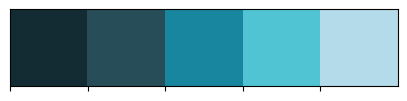

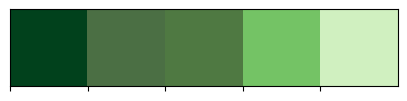

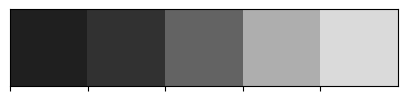

In [ ]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_blue)
sns.palplot(colors_green)
sns.palplot(colors_dark)

In [ ]:
df=pd.read_csv('water_potability.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [ ]:
df.describe().loc[['min', '50%', 'mean', 'max', 'std']].T.style.background_gradient(axis=1)

In [ ]:
columns_name = df.columns
for index, col_name in enumerate(columns_name):
    print(index, col_name)

0 ph
1 Hardness
2 Solids
3 Chloramines
4 Sulfate
5 Conductivity
6 Organic_carbon
7 Trihalomethanes
8 Turbidity
9 Potability


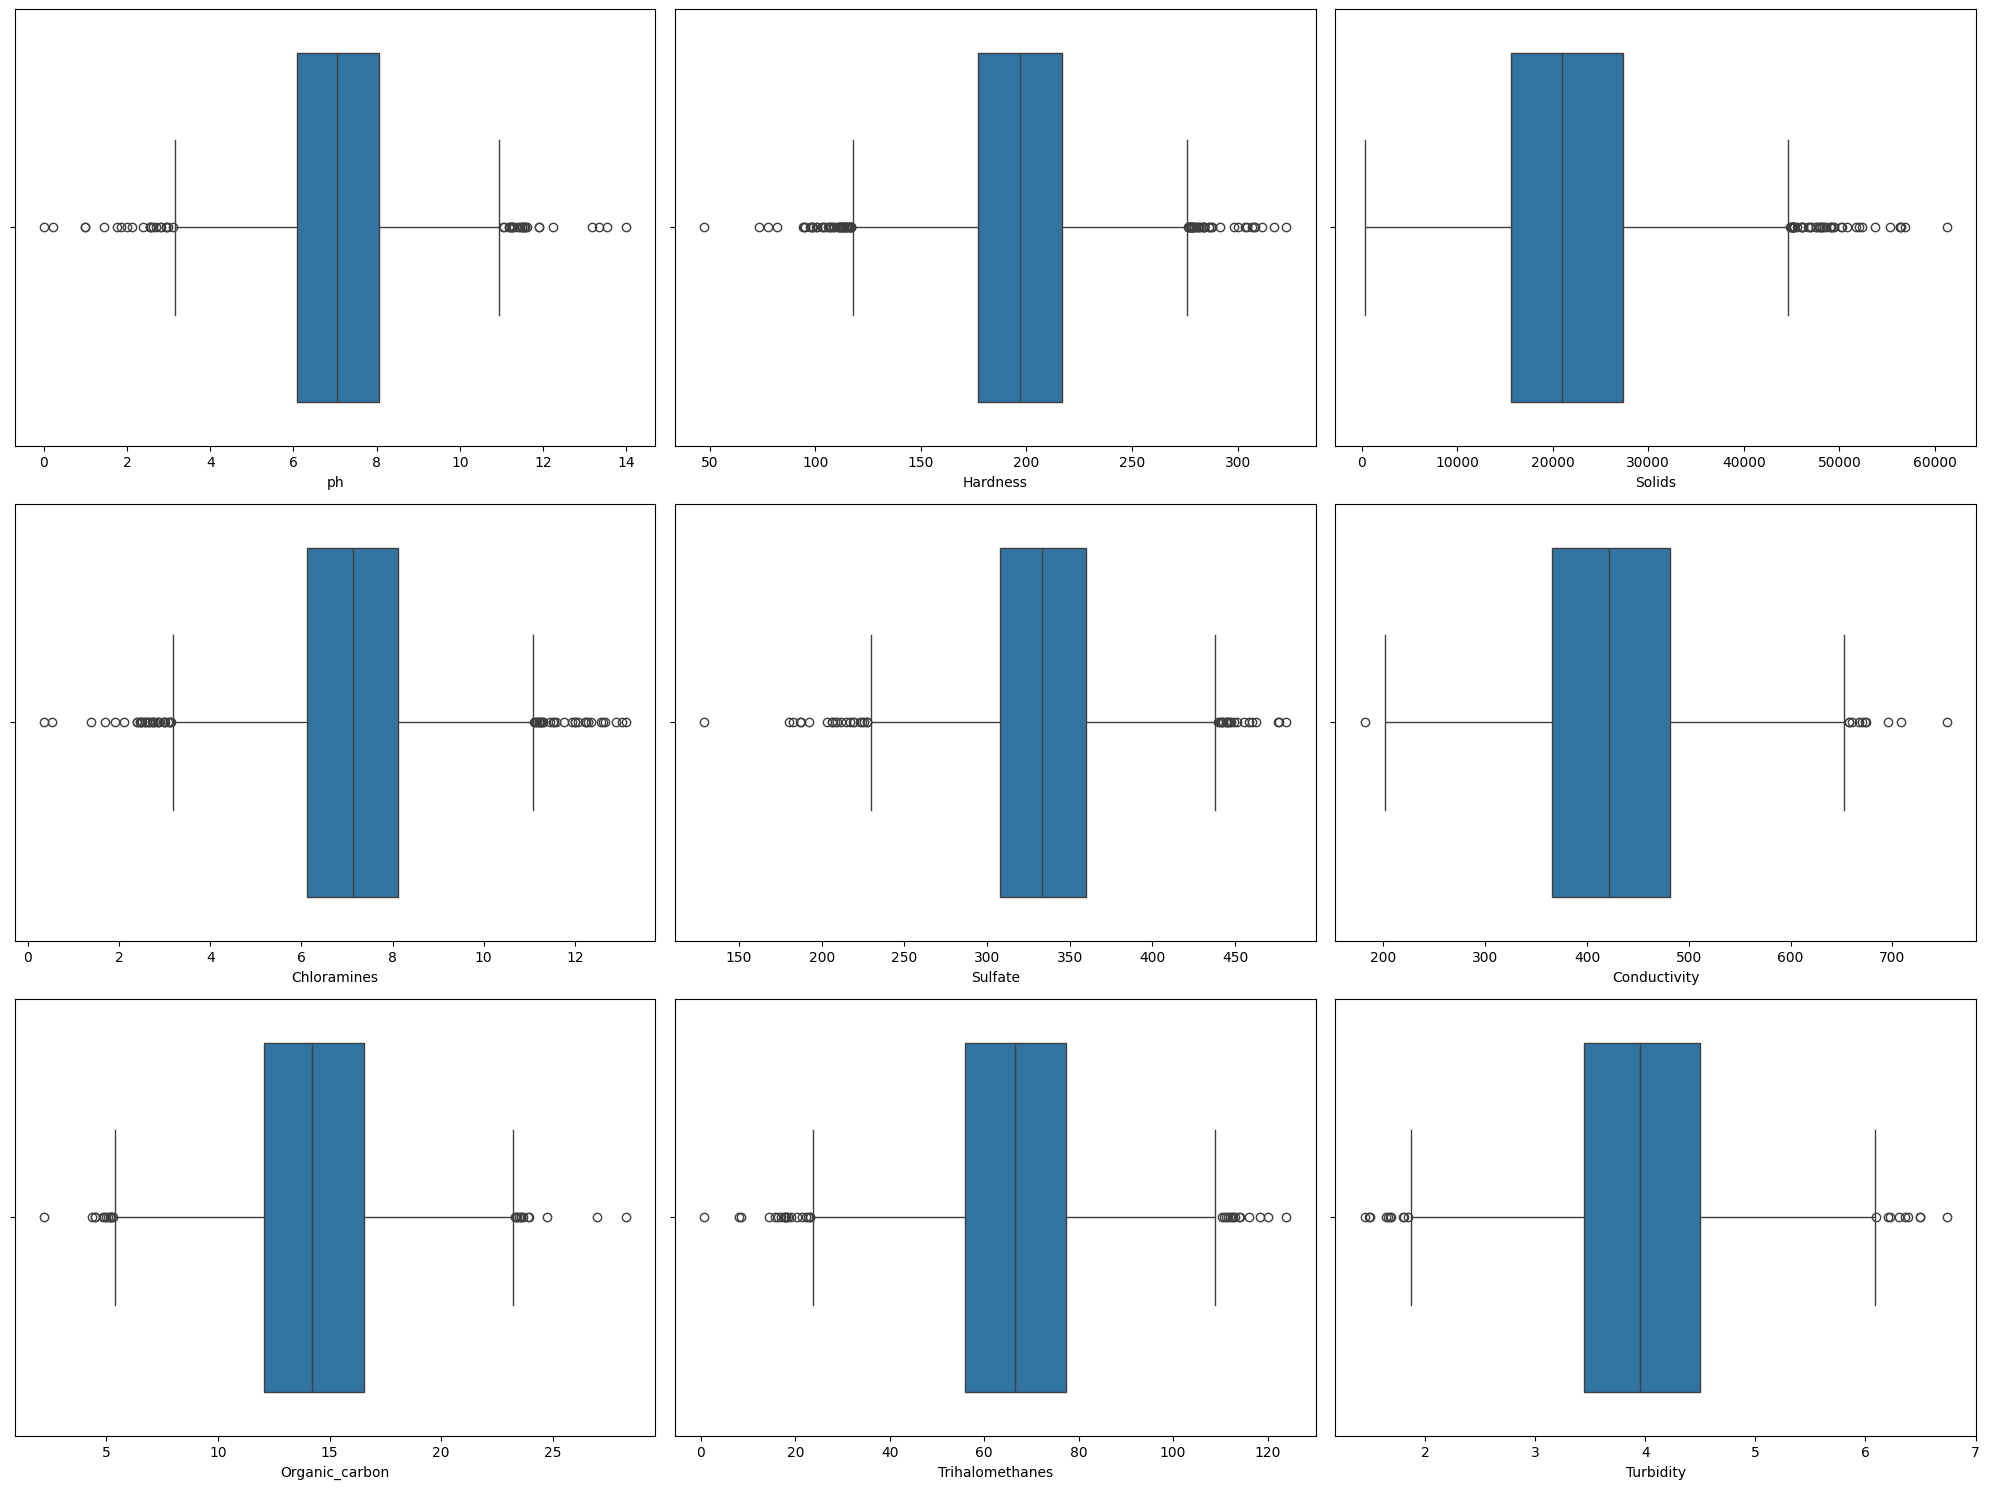

In [ ]:
columns_name = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

fig, ax = plt.subplots(3, 3, figsize=(20, 15))

for i in range(9):

    row = i // 3
    col = i % 3

    sns.boxplot(x=columns_name[i], data=df, ax=ax[row, col])
plt.tight_layout()
plt.show()

Potability
0    1998
1    1278
Name: count, dtype: int64


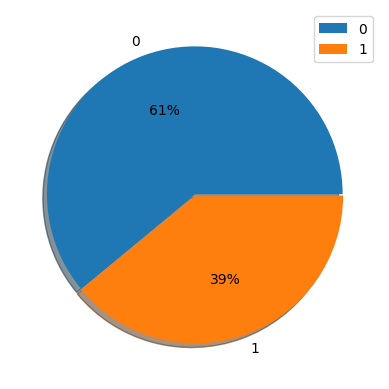

In [ ]:
tar = df['Potability'].value_counts()
print(tar)

plt.pie(tar, labels=[0, 1], explode=[0, 0.01], autopct='%.f%%', shadow=True)
plt.legend()
plt.show()

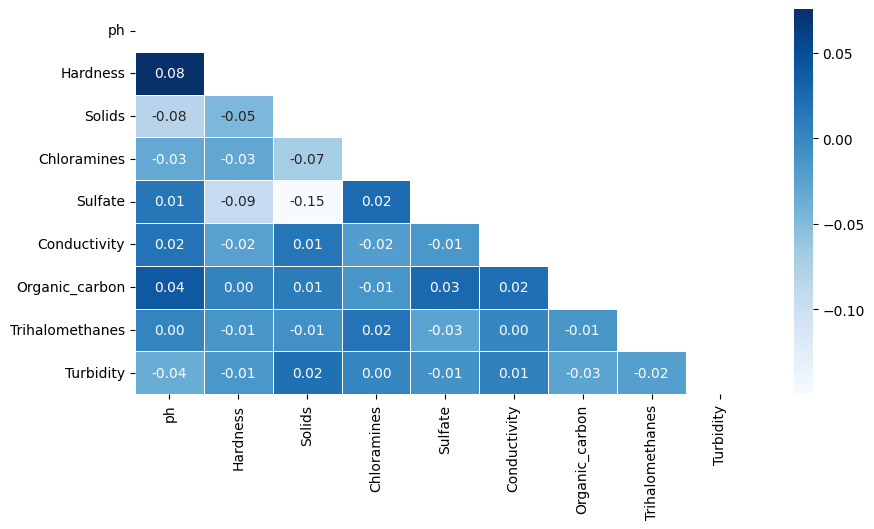

In [ ]:
corr = df.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=0.5, linecolor='white', mask=np.triu(corr), cmap='Blues')
plt.show()

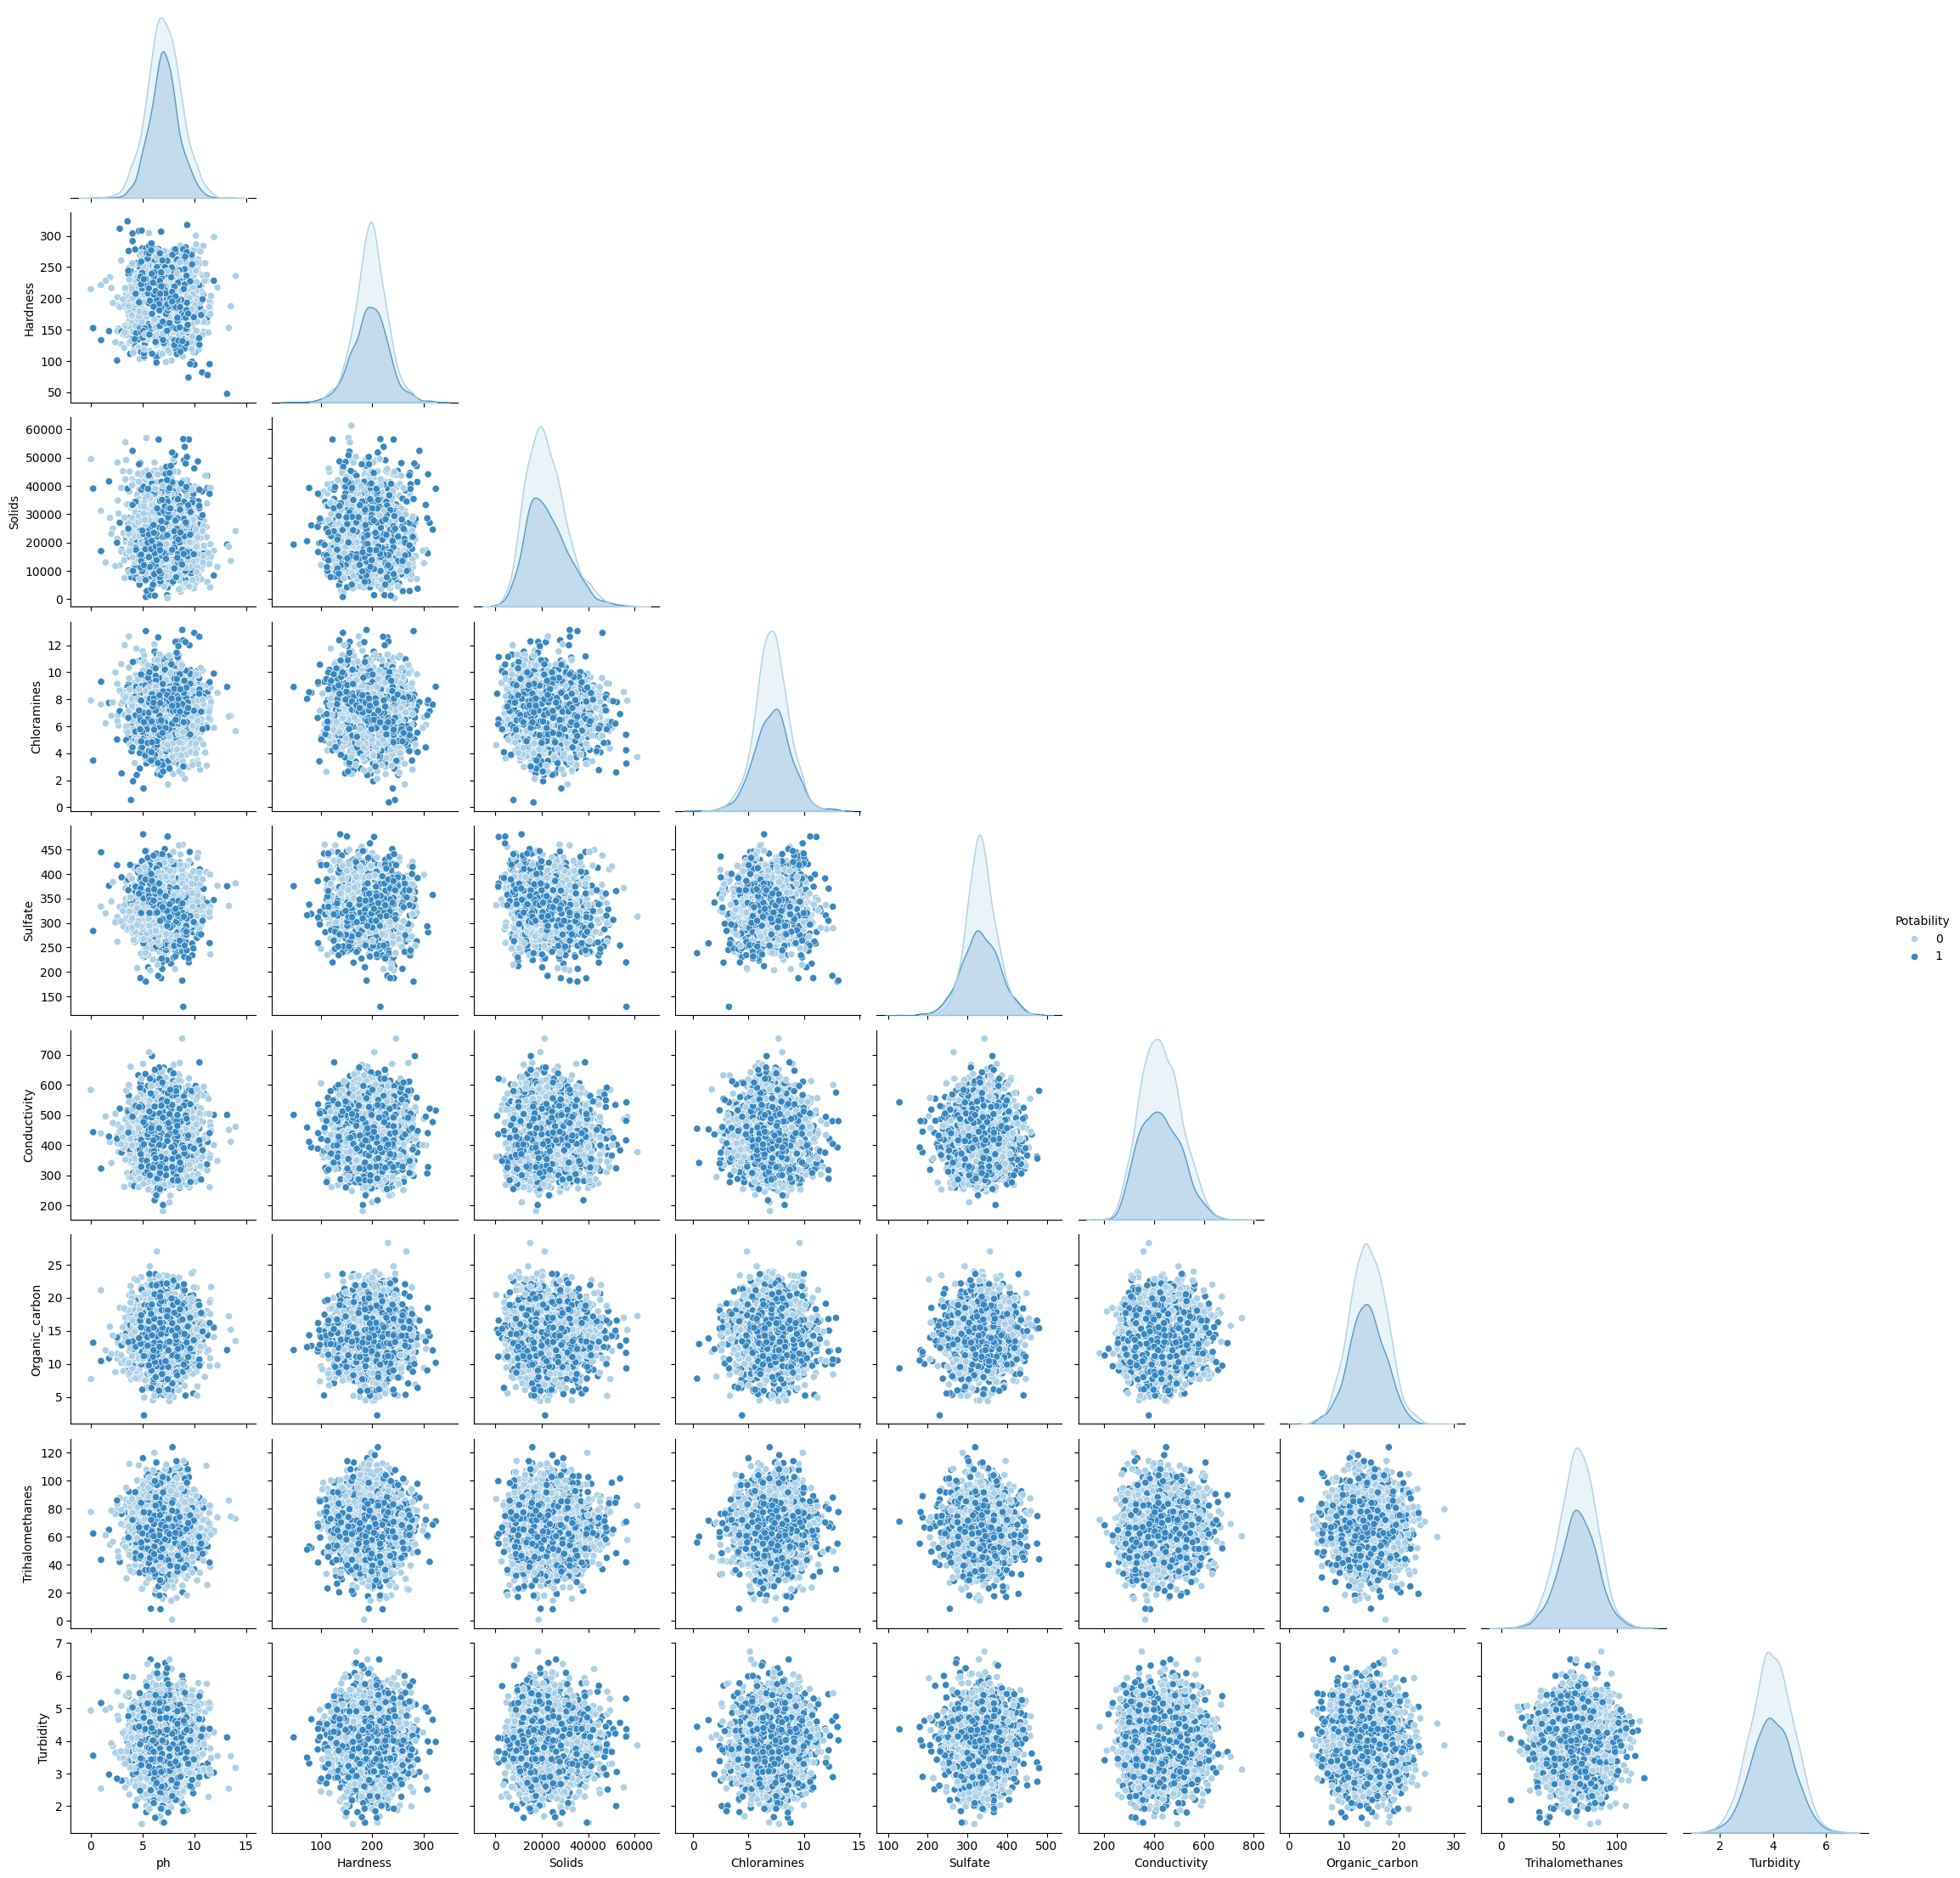

In [ ]:
sns.pairplot(df, hue='Potability', corner=True, palette='Blues')
plt.show()

In [ ]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [ ]:
print("Number of all samples : ", len(df))

Number of all samples :  3276


In [ ]:
print('Percentage(%) of nulls for each columns : \n')
print((df.isna().sum()/len(df))*100)

Percentage(%) of nulls for each columns : 

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


In [ ]:
print("For Potability=1")
df[df.Potability==1][['ph', 'Sulfate', 'Trihalomethanes']].median()

For Potability=1


ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

In [ ]:
print("For Potability=1")
df[df.Potability==0][['ph', 'Sulfate', 'Trihalomethanes']].median()

For Potability=1


ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

In [ ]:
df['ph'] = df['ph'].fillna(value=df['ph'].median())
df['Sulfate'] = df['Sulfate'].fillna(value=df['Sulfate'].median())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median())

In [ ]:
df.isna().sum().sum()

np.int64(0)

In [ ]:
# Define X,Y
X = df.drop(columns='Potability')
y = df.Potability

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
df.describe().loc[['min', 'mean', 'std', 'max']].T.style.background_gradient(axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [ ]:
# A function to plot "Confusion Matrix" and "Classification Report"
def plot_result(y_pred) :
    '''
    1) plot Confusion Matrix
    2) plot Classification Report
    '''
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    fig.tight_layout()
    #AX left - Confusion Matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    ax[0]=sns.heatmap(cm, cmap='Blues', annot=True, fmt='', linewidths=0.5, ax=ax[0])
    ax[0].set_xlabel('Prediced labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['0', '1'])
    ax[0].yaxis.set_ticklabels(['0', '1'])
    #
    # AX Right - Classification Report
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    ax[1] = sns.heatmap(cr, cmap='Blues', annot=True, fmt='0.3f', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from termcolor import colored

lr = LogisticRegression()

parameters = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}

lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=20).fit(X_train, y_train)

print(colored('Tuned hyper parameters :\n{}'.format(lr_cv.best_params_), 'blue'))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/

Tuned hyper parameters :
{'C': 1, 'solver': 'liblinear'}


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.11/dist-packages/sklearn/

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from termcolor import colored

# Scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define model
lr = LogisticRegression(max_iter=1000)

# Define parameter grid
parameters = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}

# Perform Grid Search
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=20).fit(X_train, y_train)

print(colored('Tuned hyper parameters :\n{}'.format(lr_cv.best_params_), 'blue'))


Tuned hyper parameters :
{'C': 0.1, 'solver': 'liblinear'}


In [ ]:
from termcolor import colored
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=20).fit(X_train, y_train)
print(colored('Tuned hyper parameters :\n{}'.format(lr_cv.best_params_), 'blue'))


Tuned hyper parameters :
{'C': 0.1, 'solver': 'liblinear'}


In [ ]:
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print(colored('LogisticRegression Score : {}'.format(lr_score), 'green'))

LogisticRegression Score : 0.627


In [ ]:
from sklearn import metrics

def plot_result(y_pred):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    fig.tight_layout()
    #AX left - Confusion Matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    ax[0]=sns.heatmap(cm, cmap='Blues', annot=True, fmt='', linewidths=0.5, ax=ax[0])
    ax[0].set_xlabel('Prediced labels', fontsize=18)

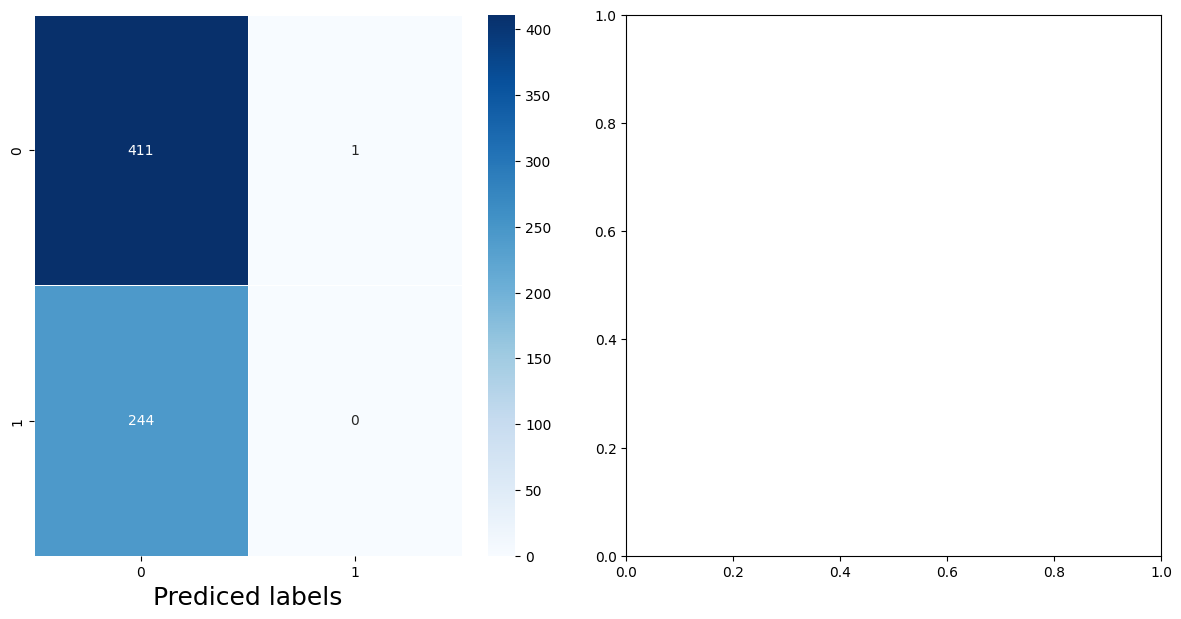

In [ ]:
plot_result(y_pred_lr)

In [ ]:
# # a dictionary to define parameters to test in algorithm
# parameters = {
#     'n_estimators' : [1000],
#     'criterion' : ['log_loss'],
#     'max_features' : ['sqrt'],
#     'n_jobs' : [-1]
# }

# rf = RandomForestClassifier()
# rf_cv = GridSearchCV(estimator=rf, param_grid=parameters, cv=20).fit(X_train, y_train)
# print(colored('Tuned hyper parameters :\n{}'.format(rf_cv.best_params_), 'blue'))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from termcolor import colored

parameters = {
    'n_estimators': [100, 300, 500],
    'criterion': ['log_loss'],
    'max_features': ['sqrt'],
    'n_jobs': [-1]
}

rf = RandomForestClassifier()

rf_cv = GridSearchCV(estimator=rf, param_grid=parameters, cv=3, verbose=2).fit(X_train, y_train)

print(colored('Tuned hyper parameters :\n{}'.format(rf_cv.best_params_), 'blue'))


Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END criterion=log_loss, max_features=sqrt, n_estimators=100, n_jobs=-1; total time=   0.9s
[CV] END criterion=log_loss, max_features=sqrt, n_estimators=100, n_jobs=-1; total time=   0.9s
[CV] END criterion=log_loss, max_features=sqrt, n_estimators=100, n_jobs=-1; total time=   0.9s
[CV] END criterion=log_loss, max_features=sqrt, n_estimators=300, n_jobs=-1; total time=   2.7s
[CV] END criterion=log_loss, max_features=sqrt, n_estimators=300, n_jobs=-1; total time=   3.5s
[CV] END criterion=log_loss, max_features=sqrt, n_estimators=300, n_jobs=-1; total time=   3.3s
[CV] END criterion=log_loss, max_features=sqrt, n_estimators=500, n_jobs=-1; total time=   4.4s
[CV] END criterion=log_loss, max_features=sqrt, n_estimators=500, n_jobs=-1; total time=   5.1s
[CV] END criterion=log_loss, max_features=sqrt, n_estimators=500, n_jobs=-1; total time=   5.1s
Tuned hyper parameters :
{'criterion': 'log_loss', 'max_features': 'sqrt', 'n

In [ ]:
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print(colored('RandomForestClassifier Score : {}'.format(rf_score), 'green'))

RandomForestClassifier Score : 0.68


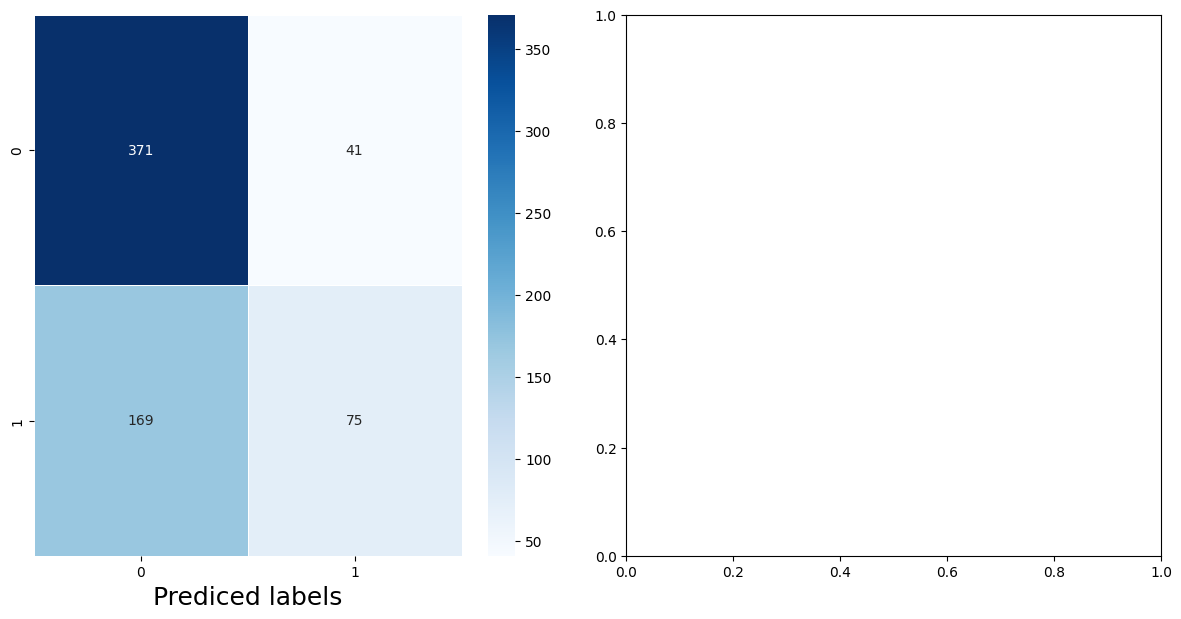

In [ ]:
plot_result(y_pred_rf)

In [ ]:
# from sklearn.neural_network import MLPClassifier

# mlp = MLPClassifier()
# mlp_cv = GridSearchCV(estimator=mlp, param_grid=parameters, cv=20).fit(X_train, y_train)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from termcolor import colored

# Step 1: Scale your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 2: Define correct parameter grid for MLP
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [300],
}

# Step 3: Initialize and run GridSearchCV
mlp = MLPClassifier(random_state=42)

mlp_cv = GridSearchCV(estimator=mlp, param_grid=parameters, cv=3, verbose=2).fit(X_train_scaled, y_train)

print(colored('Tuned hyper parameters :\n{}'.format(mlp_cv.best_params_), 'blue'))


Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   2.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   1.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=300, solver=sgd; total time=   1.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=300, solver=sgd; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=300, solver=sgd; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   1.3s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.9s
[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   0.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=300, solver=sgd; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=300, solver=sgd; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=300, solver=sgd; total time=   1.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   2.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   1.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=300, solver=sgd; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=300, solver=sgd; total time=   1.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=300, solver=sgd; total time=   1.8s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   1.1s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   1.6s
[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   2.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=300, solver=sgd; total time=   2.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=300, solver=sgd; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=300, solver=sgd; total time=   1.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   4.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   7.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   4.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=300, solver=sgd; total time=   6.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=300, solver=sgd; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=300, solver=sgd; total time=   4.3s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   4.9s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   2.2s
[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   1.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=300, solver=sgd; total time=   4.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=300, solver=sgd; total time=   6.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=relu, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=300, solver=sgd; total time=   4.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   3.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   3.8s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=300, solver=sgd; total time=   0.7s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=300, solver=sgd; total time=   0.6s
[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=300, solver=sgd; total time=   0.6s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   3.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   3.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=300, solver=sgd; total time=   3.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=300, solver=sgd; total time=   3.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(50,), learning_rate_init=0.01, max_iter=300, solver=sgd; total time=   3.3s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   5.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   5.4s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=300, solver=sgd; total time=   0.8s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=300, solver=sgd; total time=   0.8s
[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.001, max_iter=300, solver=sgd; total time=   0.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   5.4s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   4.9s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=300, solver=sgd; total time=   6.1s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=300, solver=sgd; total time=   7.0s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(100,), learning_rate_init=0.01, max_iter=300, solver=sgd; total time=   5.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=300, solver=adam; total time=   9.7s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=300, solver=adam; total time=  11.8s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=300, solver=adam; total time=  11.7s
[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=300, solver=sgd; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=300, solver=sgd; total time=   1.3s
[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.001, max_iter=300, solver=sgd; total time=   1.4s
[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   7.4s
[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   4.9s
[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=300, solver=adam; total time=   7.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=300, solver=sgd; total time=  11.5s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=300, solver=sgd; total time=   9.2s


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning:

Training interrupted by user.



[CV] END activation=tanh, hidden_layer_sizes=(100, 50), learning_rate_init=0.01, max_iter=300, solver=sgd; total time=  22.0s
Tuned hyper parameters :
{'activation': 'relu', 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001, 'max_iter': 300, 'solver': 'sgd'}


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.



In [ ]:
parameters = {
    'hidden_layer_sizes' : [500],
    'activation' : ['logistic'],
    'alpha' : [0.0001],
    'batch_size' : [200],

}

mlp = MLPClassifier()
mlp_cv = GridSearchCV(estimator=mlp, param_grid=parameters, cv=20).fit(X_train, y_train)

print(colored('Tuned hyper parameters :\n{}'.format(mlp_cv.best_params_), 'blue'))

Tuned hyper parameters :
{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 200, 'hidden_layer_sizes': 500}


In [ ]:
mlp = MLPClassifier(**mlp_cv.best_params_).fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

mlp_score = round(mlp.score(X_test, y_test), 3)
print(colored('MLPClassifier Score : {}'.format(mlp_score), 'green'))

MLPClassifier Score : 0.631


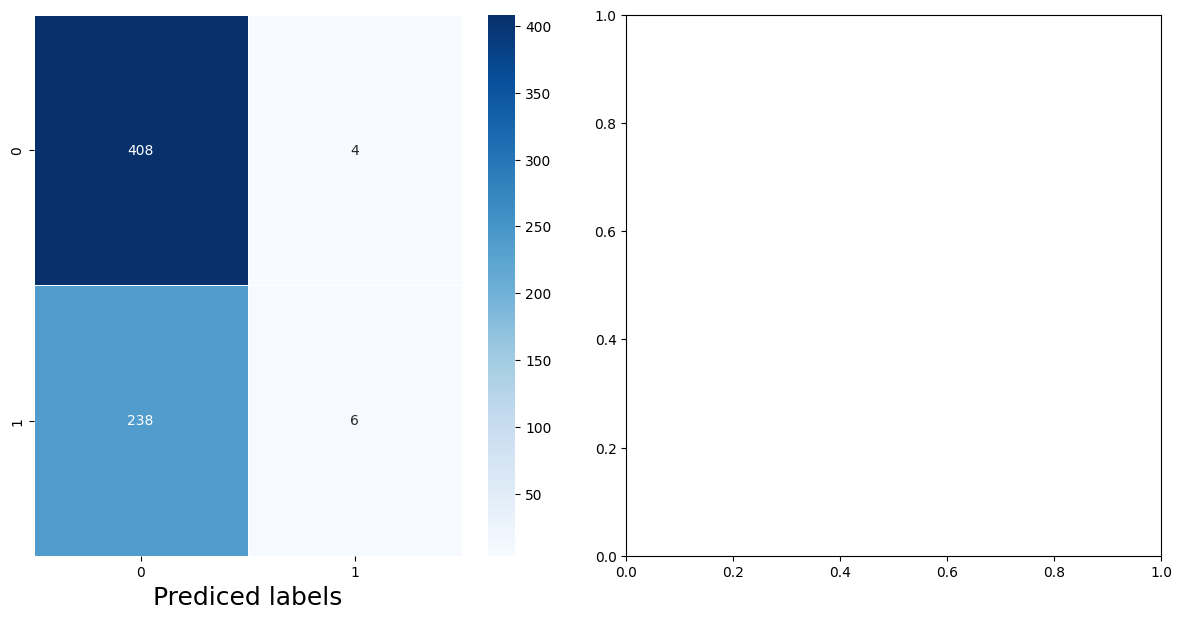

In [ ]:
plot_result(y_pred_mlp)

In [ ]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

print(colored('Tuned hyper parameters :\n{}'.format(knn_cv.best_params_), 'blue'))

Tuned hyper parameters :
{'n_neighbors': np.int64(21), 'p': 3, 'weights': 'distance'}


In [ ]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print(colored('KNeighborsClassifier Score : {}'.format(knn_score), 'green'))

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
plot_result(y_pred_knn)

NameError: name 'plot_result' is not defined

In [ ]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'KNeighborsClassifier', 'MLPClassifier'],
    'Score' : [rf_score, lr_score,  knn_score, mlp_score]
})


result.style.background_gradient()

<ipython-input-63-d926e1b0bf29>:5: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



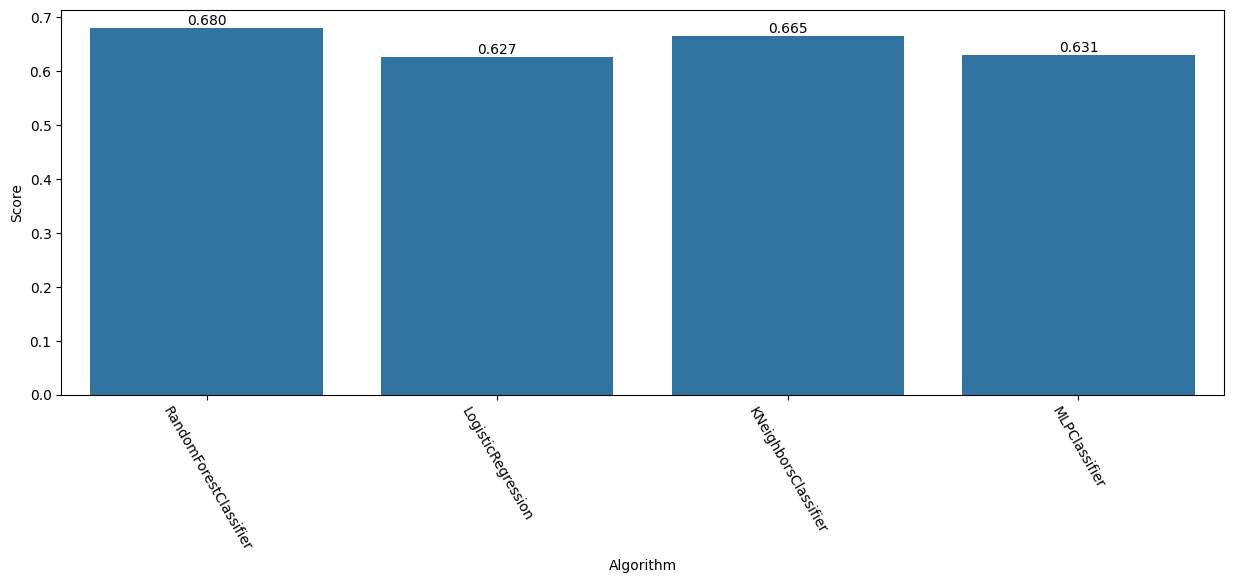

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(labels=result.Algorithm, rotation=300)
plt.show()

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# ✅ Dummy data for training the model (simulate real water data)
X_dummy = np.random.rand(100, 9)  # 100 samples, 9 features
y_dummy = np.random.randint(0, 2, 100)  # Binary labels: 0 or 1

# Fit the scaler and model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dummy)

model = RandomForestClassifier(n_estimators=300, criterion='log_loss', max_features='sqrt', n_jobs=-1)
model.fit(X_scaled, y_dummy)

# Input from user
feature_names = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
                 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

print("Enter the following values:")
input_features = []
for feature in feature_names:
    try:
        value = float(input(f"{feature}: "))
        input_features.append(value)
    except ValueError:
        print("❌ Invalid input! Please enter a number.")
        exit()

# Predict
input_array = np.array(input_features).reshape(1, -1)
input_scaled = scaler.transform(input_array)
prediction = model.predict(input_scaled)[0]

# Output
label = "✅ Safe to drink" if prediction == 1 else "❌ Not safe to drink"
print(f"\n🔍 Prediction Result: Potability: {label} (Class: {prediction})")


Enter the following values:
ph: 2
Hardness: 2
Solids: 
❌ Invalid input! Please enter a number.
Chloramines: 2
Sulfate: 2
Conductivity: 2
Organic_carbon: 2
Trihalomethanes: 2
Turbidity: 2


ValueError: X has 8 features, but StandardScaler is expecting 9 features as input.